In [96]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from analysis.dataset.june_dataset import JuNEDataset
from analysis.metrics.metrics_transtions import TransitionMetrics


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
path = Path("../data/all_data_06_09_2023.csv")
df_hack = pd.read_csv(path, index_col=0)
df_hack.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,NaN,NaN,NaN,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",NaN,student_7,False,NaN
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,"helper_functions,"
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,"
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,"helper_functions,"
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,"


In [28]:
june = JuNEDataset(df_hack)
june.prepare_dataset()
june.df.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label,task
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,None,None,None,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",None,student_7,False,None,task1
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,"helper_functions,",task1
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,",task1
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,"helper_functions,",task1
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,",task1


In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

labels = june.df.cell_label.fillna("").apply(lambda x: x.split(",")[:-1])

mlb = MultiLabelBinarizer()

onehot_labels = pd.DataFrame(
    mlb.fit_transform(labels),
    columns=mlb.classes_,
    index=labels.index
)
onehot_labels.head()


,comment_only,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [36]:
df_with_onehot = pd.concat([june.df, onehot_labels], axis=1)
df_with_onehot.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,...,comment_only,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,None,None,None,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",...,0,0,0,0,0,0,0,0,0,0
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0


In [42]:
### steps in a data science notebook life cycle
labels = [
    'helper_functions', 'load_data', 'data_exploration',
    'data_preprocessing', 'modelling', 'evaluation',
    'prediction', 'result_visualization', 'save_results', 'comment_only'
]
label_count_per_cell = df_with_onehot[labels].sum(axis=1).values


In [46]:
df_with_single_label = df_with_onehot[label_count_per_cell == 1]
df_with_single_label.shape


(18507, 25)

In [57]:
df_with_single_label.loc['label'] = df_with_single_label.cell_label.fillna("").apply(
    lambda x: x.strip().split(',')[0]
)
df_with_single_label.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,...,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results,label
1,1.0,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,helper_functions
2,2.0,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,helper_functions
3,3.0,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,helper_functions
4,4.0,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,helper_functions
5,5.0,2023-05-06 10:33:01.263,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,helper_functions


In [82]:
df_with_single_label.shape

(18508, 26)

In [83]:
processor = TransitionMetrics()
all_transitions = processor.calculate_metrics(df_with_single_label)
all_transitions.head()


100%|██████████| 31/31 [00:00<00:00, 3224.07it/s]


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,cell_label_from,cell_label_to,inner_transition,changes,type,event_from,event_to
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,e139884774504ae997d7e38e6be6da88,0.0,# # Do not forget to check if your notebook lo...,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,8fd58da2205544c1a978c43701cd5678,0.0,# # Do not forget to check if your notebook lo...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN


In [87]:
execution_transitions = all_transitions[all_transitions.type == "execution_transition"]
execution_transitions.shape

(7542, 14)

In [88]:
all_transitions_merged = execution_transitions.merge(
    june.df[['task', 'kernel_id', 'expert']].drop_duplicates(subset=['task', 'kernel_id'], keep='last'),
    on='kernel_id'
)
all_transitions_merged.head()


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,cell_label_from,cell_label_to,inner_transition,changes,type,event_from,event_to,task,expert
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,e139884774504ae997d7e38e6be6da88,0.0,# # Do not forget to check if your notebook lo...,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,8fd58da2205544c1a978c43701cd5678,0.0,# # Do not forget to check if your notebook lo...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False


In [92]:
grouped_transitions = all_transitions_merged.groupby(['cell_label_from']) \
    .cell_label_to.value_counts().reset_index().rename({"count": "transitions_count"}, axis=1)

grouped_transitions['probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

grouped_transitions.head()


,cell_label_from,cell_label_to,transitions_count,probability
0,comment_only,comment_only,408,0.054097
1,comment_only,data_exploration,242,0.032087
2,comment_only,data_preprocessing,232,0.030761
3,comment_only,helper_functions,128,0.016972
4,comment_only,modelling,39,0.005171


In [94]:
transitions_matrix = grouped_transitions.pivot(
    index='cell_label_from', columns='cell_label_to', values='probability'
).fillna(0)
transitions_matrix


cell_label_to,comment_only,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results
cell_label_from,,,,,,,,,,
comment_only,0.054097,0.032087,0.030761,0.000398,0.016972,0.001591,0.005171,0.001458,0.000398,0.000133
data_exploration,0.028640,0.218775,0.049456,0.000133,0.026916,0.003713,0.003978,0.001061,0.000530,0.000796
data_preprocessing,0.034341,0.048130,0.154866,0.000000,0.016839,0.003315,0.004906,0.000398,0.000133,0.000000
evaluation,0.000133,0.000133,0.000133,0.000530,0.000796,0.000000,0.000133,0.000133,0.000000,0.000000
helper_functions,0.016309,0.023866,0.015646,0.000398,0.080615,0.008353,0.003315,0.003315,0.000265,0.000000
load_data,0.001989,0.008088,0.006232,0.000000,0.000663,0.012861,0.000000,0.000000,0.000000,0.000000
modelling,0.003182,0.001856,0.002917,0.000398,0.003447,0.000000,0.024662,0.011668,0.000000,0.000133
prediction,0.004641,0.002121,0.003315,0.000265,0.001856,0.000000,0.005171,0.007823,0.000133,0.000000
result_visualization,0.000000,0.000398,0.000000,0.000000,0.000265,0.000000,0.000796,0.000000,0.000133,0.000000


Text(120.58159722222221, 0.5, 'current state')

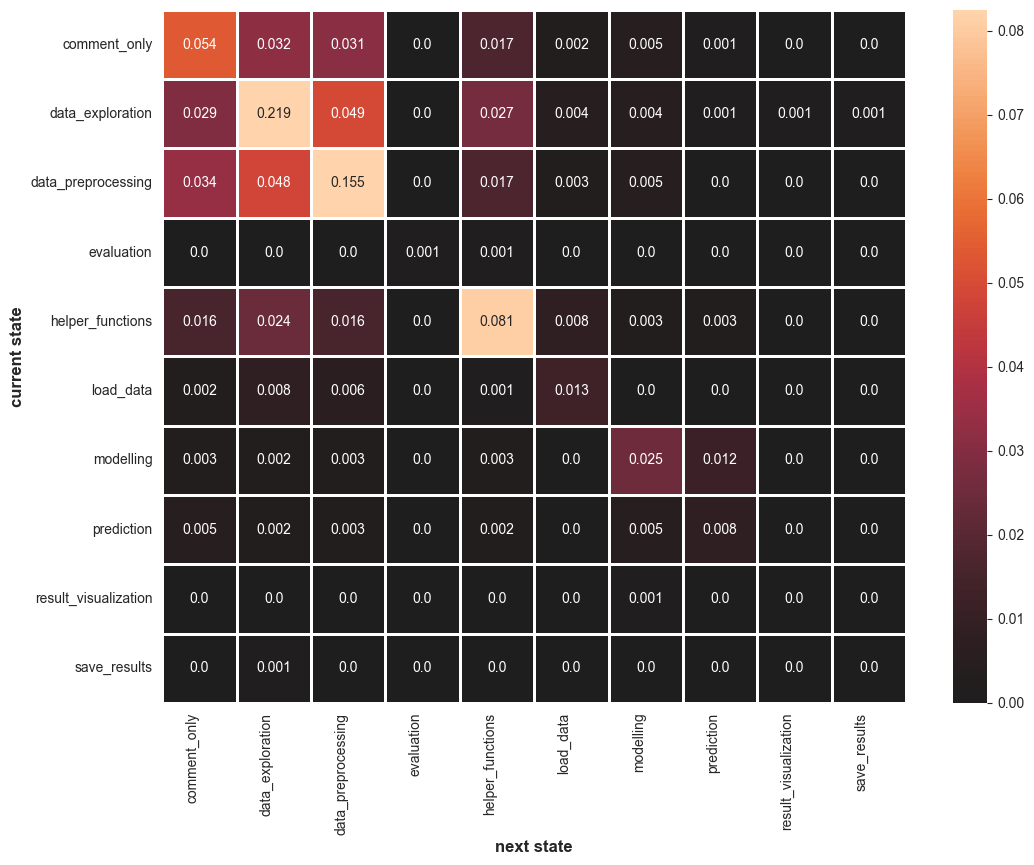

In [101]:
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(
    transitions_matrix.round(3),
    annot=True,
    fmt="",
    linewidths=1,
    robust=True, center=0
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

ax.set_xlabel("next state", fontsize=12, fontweight='bold')
ax.set_ylabel("current state", fontsize=12, fontweight='bold')
